In [92]:
# Basic Packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from simple_colors import *

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [93]:
# Getting the Data
os.getcwd()
db  = pd.read_csv("Data/stud.csv")

In [94]:
# Reading Data
db.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [95]:
"""
Displaying unique contents in a columns
"""


# Gender
print(green("Unique Gender Values :",'bold'),db['gender'].unique())

# Etnicity
print(green("\nUnique race_ethnicity Values :",'bold'),db['race_ethnicity'].unique())

# Education
print(green("\nUnique Education Values :",'bold'),db['parental_level_of_education'].unique())

# Lunch
print(green("\nUnique Lunch Values :",'bold'),db['lunch'].unique())

# Preparation
print(green("\nUnique Preparation Values :",'bold'),db['test_preparation_course'].unique())

Unique Gender Values : ['female' 'male']

Unique race_ethnicity Values : ['group B' 'group C' 'group A' 'group D' 'group E']

Unique Education Values : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique Lunch Values : ['standard' 'free/reduced']

Unique Preparation Values : ['none' 'completed']


##### Preparing X and Y Variable

In [96]:
# X & Y Variables
X= df.drop(columns=['math_score'],axis=1)
y = df.math_score

In [97]:
# Checkin Variables are Created properly
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [98]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


In [99]:
"""
OneHotEncoding for Categorical Values.
Scaling for numerical values which STD. DEV (1) Mean is 0
ColumnTransform for mixed values both numerical and categorical Values

"""
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_tranformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScalar",numeric_tranformer,num_features)
     ]
)


In [100]:
X = preprocessor.fit_transform(X)

In [101]:
X.shape

(1000, 19)

In [102]:
# Seperating Dat into test train Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)


# Sizes of train test Data
X_test.shape,X_train.shape

((200, 19), (800, 19))

##### Evaluating Models and Metrics 

In [103]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [104]:
# Testing all models to determine which is the best suitable.
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.6f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.6f}".format(model_train_mae))
    print("- R2 Score: {:.6f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.6f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.6f}".format(model_test_mae))
    print("- R2 Score: {:.6f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')





Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.290460
- Mean Absolute Error: 4.214023
- R2 Score: 0.878820
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.475369
- Mean Absolute Error: 4.405156
- R2 Score: 0.865514


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.507578
- Mean Absolute Error: 5.140002
- R2 Score: 0.816650
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.721202
- Mean Absolute Error: 5.270475
- R2 Score: 0.797351


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.289039
- Mean Absolute Error: 4.212004
- R2 Score: 0.878885
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.480787
- Mean Absolute Error: 4.404963
- R2 Score: 0.865247


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.827040
- Mean Absolute Error: 4.570500
- 

##### Liner Regression

In [105]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.55


In [106]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.865514
2,Ridge,0.865247
7,CatBoosting Regressor,0.841864
8,AdaBoost Regressor,0.832083
5,Random Forest Regressor,0.822581
1,Lasso,0.797351
6,XGBRegressor,0.794372
3,K-Neighbors Regressor,0.776957
4,Decision Tree,0.677014


##### Plot X_pred & Y_pred

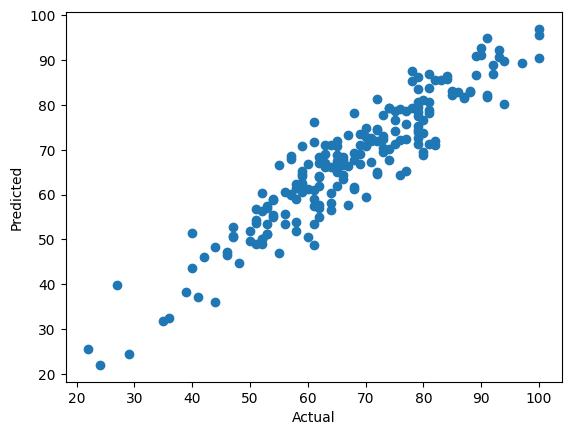

In [107]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

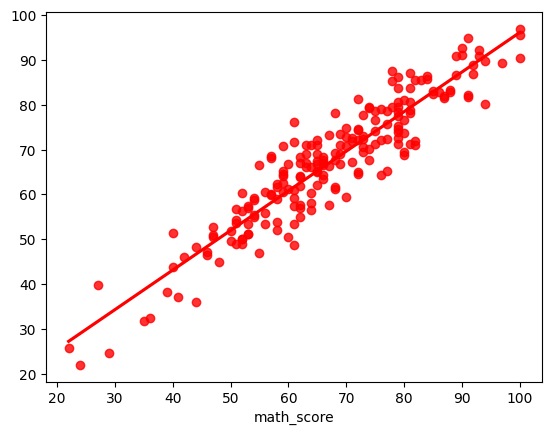

In [108]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [109]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
825,62,67.09375,-5.09375
374,59,64.03125,-5.03125
488,64,60.28125,3.71875
608,61,60.90625,0.09375
42,53,57.03125,-4.03125
...,...,...,...
664,80,69.40625,10.59375
962,100,96.93750,3.06250
144,88,82.93750,5.06250
955,72,72.03125,-0.03125
